In [1]:
# Initial imports
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
import datetime as dt
from datetime import date,timedelta
from numpy import array

In [2]:
# Load the lare closing price file
file1="predictions2000s.56d.15e.100ip.csv"
predictions1_df=pd.read_csv(file1)
predictions1_df.head()

,Date,SecuritiesCode,Close
0,2021-12-06,1301,2992.687054
1,2021-12-06,1332,579.618975
2,2021-12-06,1333,2367.621644
3,2021-12-06,1376,1419.280200
4,2021-12-06,1377,3264.182692


In [3]:
# Load the missing files
file2="predictions_addendum.csv"
predictions2_df=pd.read_csv(file2)
predictions2_df.head()

,Date,SecuritiesCode,Close
0,2021-12-06,1375,1536.701119
1,2021-12-06,1413,2115.113352
2,2021-12-06,1431,1142.333625
3,2021-12-06,1887,570.401544
4,2021-12-06,2932,3846.972725


In [6]:
predictions_df=pd.concat([predictions1_df,predictions2_df])
predictions_df.tail()

,Date,SecuritiesCode,Close
7555,2022-02-28,9278,971.648808
7556,2022-02-28,9279,2805.864441
7557,2022-02-28,9434,1469.336046
7558,2022-02-28,9450,1476.940806
7559,2022-02-28,9519,-4348.107920


In [7]:
# getting close prices for all SecuritiesCodes
prices_target = predictions_df.pivot(index='Date', columns='SecuritiesCode', values='Close')
prices_target = prices_target.dropna()
prices_target.head()

SecuritiesCode,1301,1332,1333,1375,1376,1377,1379,1381,1407,1413,...,9982,9983,9984,9987,9989,9990,9991,9993,9994,9997
Date,,,,,,,,,,,,,,,,,,,,,
2021-12-06,2992.687054,579.618975,2367.621644,1536.701119,1419.280200,3264.182692,1922.352161,3262.643459,5295.995129,2115.113352,...,1752.308325,70702.067757,6771.672182,3168.098474,3127.299701,571.094738,820.784492,1720.982253,2382.383211,702.030116
2021-12-07,2980.222656,576.933613,2357.939207,1529.502925,1411.282416,3251.264660,1918.572289,3260.844272,5253.695422,2103.094156,...,1749.397368,70132.033935,6683.844220,3165.543545,3108.083855,568.207305,818.730381,1717.966534,2376.382090,697.417271
2021-12-08,2969.970184,574.774925,2350.475694,1524.021975,1404.414156,3241.359165,1915.941430,3261.397777,5189.168161,2092.194160,...,1747.179181,69588.363129,6608.578176,3165.265120,3092.636060,565.540172,817.544313,1715.451331,2372.232862,693.499663
2021-12-09,2961.932126,573.068998,2344.953066,1520.776899,1398.905295,3234.495904,1914.363920,3264.314954,5104.726051,2082.030433,...,1745.754321,69088.580105,6550.910220,3166.965901,3081.155512,563.227454,817.224284,1713.600392,2369.709041,690.218561
2021-12-10,2955.841259,571.730837,2341.003534,1519.989000,1394.784215,3230.370972,1913.655008,3269.361198,5004.539302,2072.318695,...,1745.090605,68639.294583,6511.678794,3170.262341,3073.340414,561.331600,817.677052,1712.431391,2368.481307,687.473304


In [8]:
# first 20 values of SecuritiesCodes for every time step.
first_20 = []
for i in range(0,len(prices_target.index),1):
      first_20.append(-np.sort(-prices_target.iloc[i, :].values)[:20])
prices_target_first_20 = pd.DataFrame(first_20,index=prices_target.index)
prices_target_first_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date,,,,,,,,,,,,,,,,,,,,
2021-12-06,71551.889733,70702.067757,68093.018444,58827.079497,50087.421035,41934.962439,39942.681808,34540.682610,31615.829105,28329.872109,26397.892886,24790.961251,22939.259959,22785.607508,22583.744117,20520.814243,19610.123660,19135.246170,19086.676116,19066.066728
2021-12-07,71325.185979,70132.033935,67878.522490,58826.859056,50108.222667,41636.742046,39972.581291,34569.773399,31434.792652,28234.659450,26313.990495,24589.706446,22925.602375,22654.747603,22368.684619,20494.570201,19394.200202,19062.278683,19026.924812,18825.008462
2021-12-08,70990.564344,69588.363129,67616.460635,58757.059913,50111.914874,41260.657539,40050.940161,34547.856126,31250.984110,28040.203449,26209.034654,24274.834746,22910.017482,22509.451070,22124.817984,20463.045209,19198.923099,19010.376306,18967.592633,18711.612689
2021-12-09,70563.964543,69088.580105,67311.686411,58630.396250,50098.906986,40809.616178,40178.497419,34475.923682,31061.997751,27754.659548,26083.913150,23861.424120,22892.916916,22340.286117,21856.373704,20427.868842,19026.291268,18984.091740,18911.168838,18721.429883
2021-12-10,70064.530478,68639.294583,66972.934252,58459.579141,50071.352790,40349.486113,40296.843064,34359.805497,30866.736062,27395.067394,25940.968263,23373.624626,22874.686899,22145.060225,21569.227489,20390.352629,19131.738992,18982.301304,18875.520707,18858.542024


In [9]:
# last 20 values of SecuritiesCodes for every time step.
last_20 = []
for i in range(0,len(prices_target.index),1):
      last_20.append(np.sort(prices_target.iloc[i, :].values)[0:20])
prices_target_last_20 = pd.DataFrame(last_20,index=prices_target.index)
prices_target_last_20.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Date,,,,,,,,,,,,,,,,,,,,
2021-12-06,38.879240,51.732458,69.204530,126.633130,130.664778,141.175978,151.733603,151.819693,153.168594,153.365114,166.113192,170.053934,171.533360,175.920329,183.351359,188.856258,193.143668,201.543529,205.828386,210.684346
2021-12-07,38.819498,51.480043,68.484828,125.903005,129.520606,140.482277,148.655849,148.959740,151.367287,153.066338,165.766358,168.480890,170.116213,175.878721,182.529054,188.067082,191.945665,201.172098,205.091171,208.971988
2021-12-08,38.769582,51.270668,67.878965,113.614433,125.297692,128.566797,140.015253,142.829131,145.474878,151.047713,153.068535,165.526658,166.815956,168.898224,175.842078,181.936101,187.482264,191.387957,200.891850,204.279855
2021-12-09,-405.852881,38.739564,51.109924,67.400039,124.805920,127.815919,135.619618,139.761275,141.384839,150.764241,153.319389,165.065513,165.389346,167.880689,175.799883,181.585397,187.146000,191.458072,200.701366,203.468623
2021-12-10,-822.285639,38.732416,50.994892,67.044567,124.410611,127.171224,127.259280,136.767218,139.685301,150.507626,153.761475,163.231903,165.340827,167.045296,175.746897,181.459239,187.056210,192.049706,200.590829,202.692000


In [10]:
weights = np.linspace(start=2, stop=1, num=20)
weights

array([2.        , 1.94736842, 1.89473684, 1.84210526, 1.78947368,
       1.73684211, 1.68421053, 1.63157895, 1.57894737, 1.52631579,
       1.47368421, 1.42105263, 1.36842105, 1.31578947, 1.26315789,
       1.21052632, 1.15789474, 1.10526316, 1.05263158, 1.        ])

In [11]:
Sup=((prices_target_first_20 * weights).sum(axis = 1))/np.mean(weights)
Sup

Date
2021-12-06    779538.145608
2021-12-07    776656.187959
2021-12-08    773249.088739
2021-12-09    769409.941119
2021-12-10    765476.497941
2021-12-13    761412.159583
2021-12-14    757270.008317
2021-12-15    753130.532769
2021-12-16    749073.355089
2021-12-17    745124.769414
2021-12-20    741342.230920
2021-12-21    737675.594944
2021-12-22    734162.064965
2021-12-23    730765.814901
2021-12-24    727473.109926
2021-12-27    724472.924566
2021-12-28    721622.220455
2021-12-29    718845.390040
2021-12-30    716198.768147
2022-01-04    713677.848434
2022-01-05    711247.447112
2022-01-06    708915.894681
2022-01-07    706747.792349
2022-01-11    704692.329338
2022-01-12    702688.026448
2022-01-13    700745.611127
2022-01-14    698874.090974
2022-01-17    697292.117235
2022-01-18    695742.097728
2022-01-19    694222.046696
2022-01-20    692731.752045
2022-01-21    691270.944215
2022-01-24    689839.350347
2022-01-25    688437.609306
2022-01-26    687070.327229
2022-01-27    6

In [12]:
Sdown=((prices_target_last_20 * weights).sum(axis = 1))/np.mean(weights)
Sdown

Date
2021-12-06     2858.482428
2021-12-07     2837.987383
2021-12-08     2726.614536
2021-12-09     2021.671966
2021-12-10     1447.470273
2021-12-13     1112.252876
2021-12-14     1016.578875
2021-12-15     1086.767448
2021-12-16     1220.897498
2021-12-17     1353.996088
2021-12-20     1443.771756
2021-12-21     1476.108424
2021-12-22     1454.060556
2021-12-23     1389.660228
2021-12-24     1292.447701
2021-12-27     1087.145691
2021-12-28      854.667841
2021-12-29      615.546143
2021-12-30      382.166105
2022-01-04       63.722073
2022-01-05     -278.710830
2022-01-06     -627.209974
2022-01-07     -977.588088
2022-01-11    -1317.732099
2022-01-12    -1655.410698
2022-01-13    -1990.758230
2022-01-14    -2322.692856
2022-01-17    -2651.568630
2022-01-18    -2979.484656
2022-01-19    -3306.514045
2022-01-20    -3632.256472
2022-01-21    -3956.738917
2022-01-24    -4280.533686
2022-01-25    -4603.971249
2022-01-26    -5104.467168
2022-01-27    -5642.859740
2022-01-28    -6167.872

In [13]:
(Sup - Sdown)

Date
2021-12-06    776679.663181
2021-12-07    773818.200576
2021-12-08    770522.474202
2021-12-09    767388.269154
2021-12-10    764029.027668
2021-12-13    760299.906707
2021-12-14    756253.429442
2021-12-15    752043.765321
2021-12-16    747852.457591
2021-12-17    743770.773326
2021-12-20    739898.459164
2021-12-21    736199.486521
2021-12-22    732708.004409
2021-12-23    729376.154673
2021-12-24    726180.662225
2021-12-27    723385.778874
2021-12-28    720767.552614
2021-12-29    718229.843896
2021-12-30    715816.602041
2022-01-04    713614.126361
2022-01-05    711526.157942
2022-01-06    709543.104654
2022-01-07    707725.380437
2022-01-11    706010.061437
2022-01-12    704343.437146
2022-01-13    702736.369357
2022-01-14    701196.783830
2022-01-17    699943.685866
2022-01-18    698721.582384
2022-01-19    697528.560741
2022-01-20    696364.008518
2022-01-21    695227.683132
2022-01-24    694119.884033
2022-01-25    693041.580555
2022-01-26    692174.794397
2022-01-27    6

In [14]:
daily_spread_return = (Sup - Sdown).mean()/(Sup - Sdown).std()
daily_spread_return

25.259970544343517

In [15]:
count_SecuritiesCode_first_20 = prices_target.isin(prices_target_first_20.values.flatten())
True_first_20 = (count_SecuritiesCode_first_20.apply(pd.Series.value_counts, axis=0).fillna(0).iloc[1:2]).T
True_first_20 = True_first_20.add_prefix('first_20_')

In [16]:
count_SecuritiesCode_last_20 = prices_target.isin(prices_target_last_20.values.flatten())
True_last_20 = (count_SecuritiesCode_last_20.apply(pd.Series.value_counts, axis=0).fillna(0).iloc[1:2]).T
True_last_20 = True_last_20.add_prefix('last_20_')

In [17]:
Count = pd.concat([True_first_20,True_last_20],axis=1)
Count

,first_20_True,last_20_True
SecuritiesCode,,
1301,0.0,0.0
1332,0.0,0.0
1333,0.0,0.0
1375,0.0,0.0
1376,0.0,0.0
...,...,...
9990,0.0,0.0
9991,0.0,0.0
9993,0.0,0.0


In [18]:
SecuritiesCode_weight = (Count/len(prices_target.index)).sum(axis=1)/2

In [19]:
df_weight = pd.DataFrame(SecuritiesCode_weight,columns=["Weight"]).reset_index()

In [20]:
df_weight

,SecuritiesCode,Weight
0,1301,0.0
1,1332,0.0
2,1333,0.0
3,1375,0.0
4,1376,0.0
...,...,...
1995,9990,0.0
1996,9991,0.0
1997,9993,0.0
1998,9994,0.0


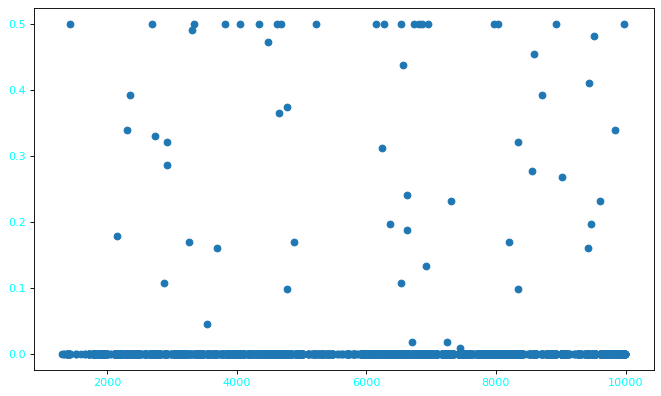

In [21]:
plt.figure(figsize=(10, 6), dpi=80)
plt.xticks(color='cyan')
plt.yticks(color='cyan')
plt.scatter(x=SecuritiesCode_weight.index,y=SecuritiesCode_weight)

In [35]:
Count.reset_index
Count.columns
top_ranked = Count.sort_values(by=['first_20_True'],ascending=False).iloc[0:20]
#top_ranked = Count.sort_values(by=['first_20_True'],ascending=False)

In [36]:
top_ranked = top_ranked.drop(columns='last_20_True',axis=1)

In [38]:
top_ranked.to_csv('stacked_lstm_top_ranked.csv')

# Top 20 Stocks for Stacked LSTM

In [37]:
for i in range(20):
     print(top_ranked.index[i])

6954
6273
6806
8035
6861
4628
5217
6532
7974
6146
4684
4051
3349
9983
4488
9435
4661
9843
9022
7309
